# Data set Context

The binary classification goal of this Dataset is to predict if the client will subscribe a bank term deposit (variable y).

- Number of Instances: 41188 

- Number of Attributes: 20 + output attribute.

- Attribute Details:

1 - age (numeric)   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed", "services","student","technician", "unemployed","unknown")   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")   
   5 - default: has credit in default? (categorical: "no","yes","unknown")   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
**related with the last contact of the current campaign:** 

   8 - contact: contact communication type (categorical: "cellular","telephone")   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - duration: last contact duration,in seconds (numeric).**Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
**social and economic context attributes**  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  
  Output variable (desired target):  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


# Task  : 
In this project we investigate the relationship between Client's choice to subscribe for a Term Deposit and Mulitple Features. Also we **predict if Client Subscribed a Term Deposit or not based on multiple features**.

# Imorting All Required Packages or Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import chi2

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings('ignore')

**Importing Data Set** : 
Importing dataset from downloaded file on System using Pandas package

In [2]:
data = pd .read_csv( r"C:\Users\SS\Downloads\MDS Course files\Projects\Data Sets\Deposite term Classifier\bank-additional-full.csv" ,sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In this Dataset y/target feature says **"Client Subscribed a Term Deposit or not"**

This Shows Data has 21 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
data .shape

(41188, 21)

This dataset has **41188 enteries/rows** and **21 features/columns**

### Info on features/columns of the Data set

In [5]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Result of this code shows 5 features are of float data type , 5 are of int data type and 11 are objects.

### Statistical Information of the Data set

In [6]:
data .describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


as we can in some features max values is far greater than 75% value. which shows there are some outliers. Also Range of all features are Different.
To Ractify this Problem we use **Feature Scaling** later in this Project.

# Null Values


As Mentioned in Dataset Context, Null values are only present ion Categorical Features as unknown.

So, first we convert unknown to NaN values

In [7]:
data = data.replace('unknown',np.nan,regex=True)
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

**Since Dataset is not too large we can't drop rows with NaN values. So, we fill NaN values with mode of the whole column.**

In [9]:
for column in data.columns:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [10]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Missing Values are Handled!

# Feature Separation on basis of their type

In [11]:
cont_features = data.select_dtypes(exclude=['object'])
all_cat_features = data.select_dtypes(include=['object'])

categorical features also contain target feature. So we remove target variable from it.

In [12]:
cat_features = all_cat_features.iloc[:,:-1]

# Correlation between continuous valued features

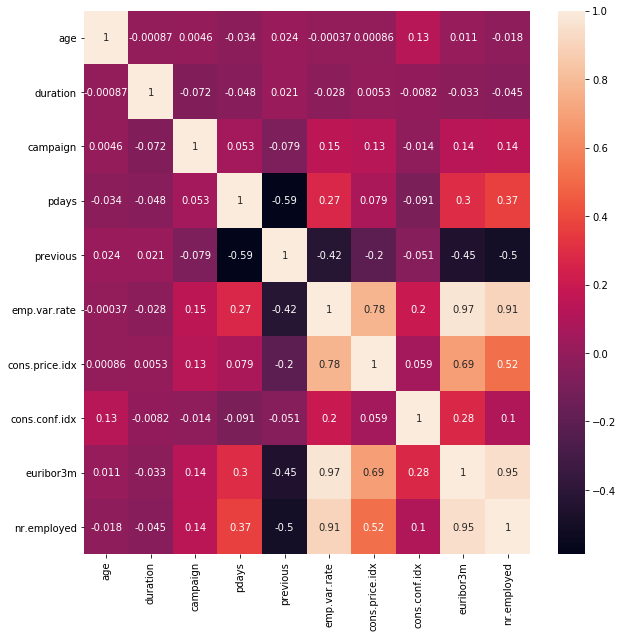

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cont_features.corr(method='pearson'), annot=True)
plt.show()

There are many Features with continuous values which are highly correlated with other features.

But we can not select features on the basis of correlation because target feature is a categorical. So, we do Feature Selection on basis of Anova.

# Data Visualization

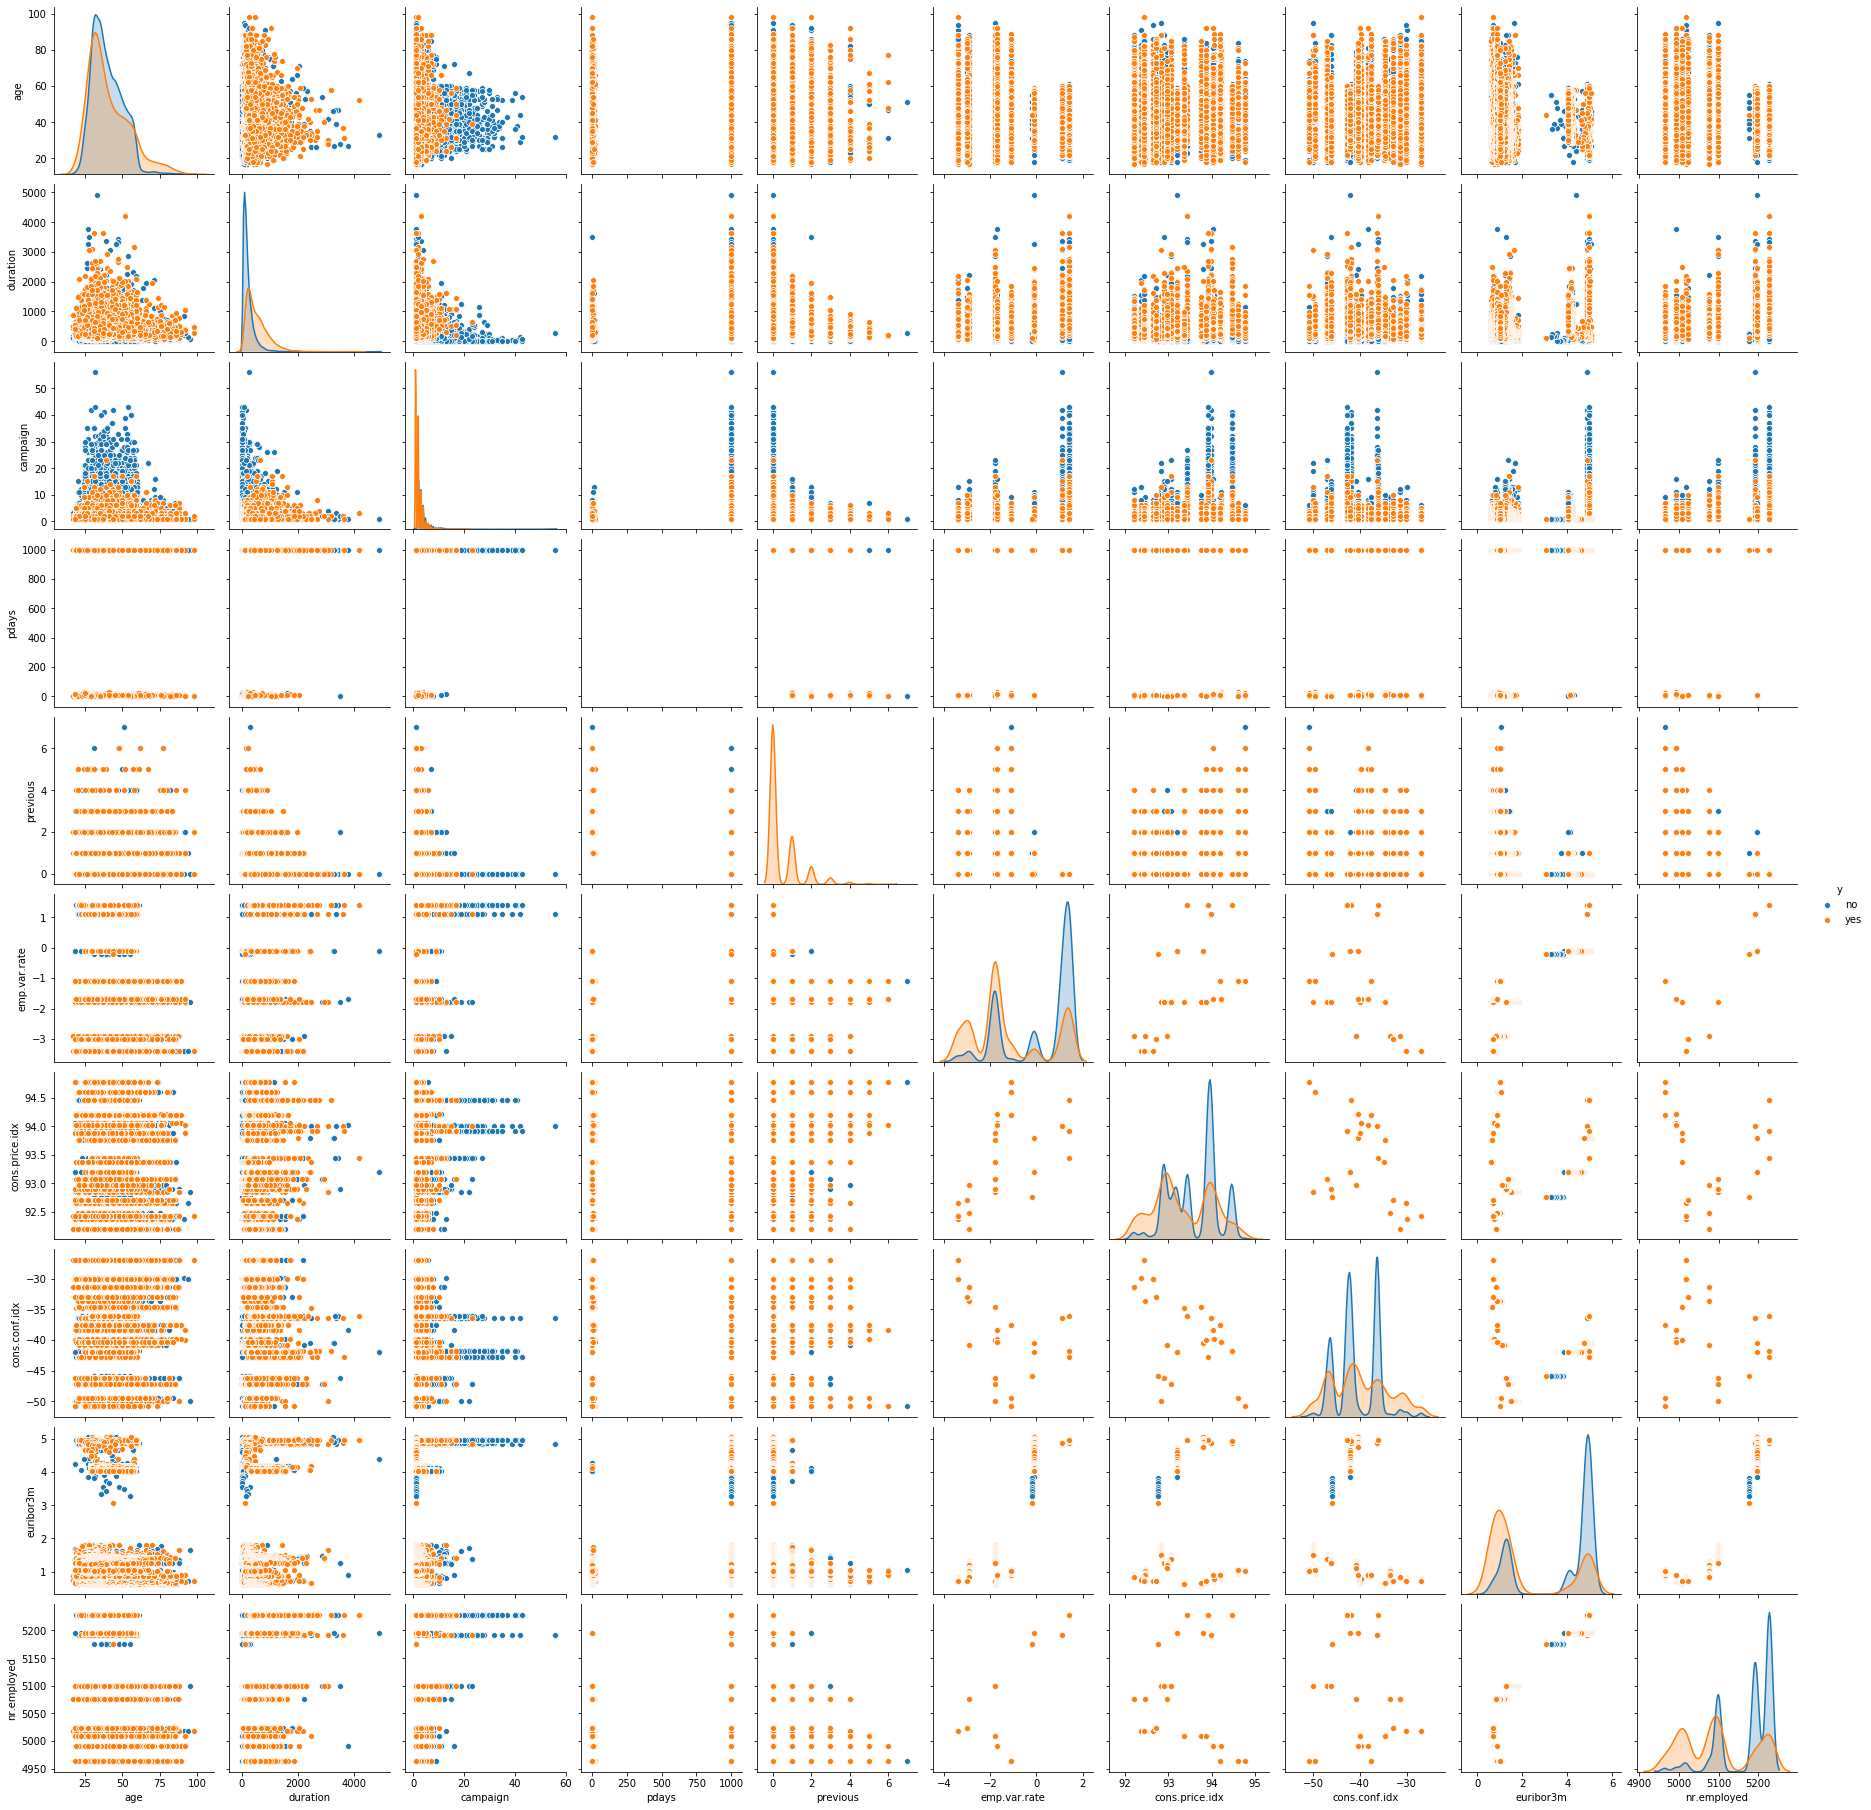

In [81]:
sns.pairplot(data,hue='y')              

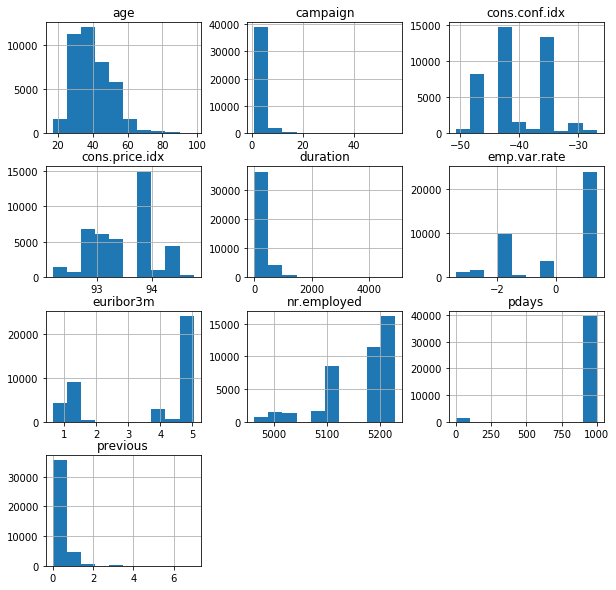

In [14]:
data.hist(figsize=(10,10))
plt.show()

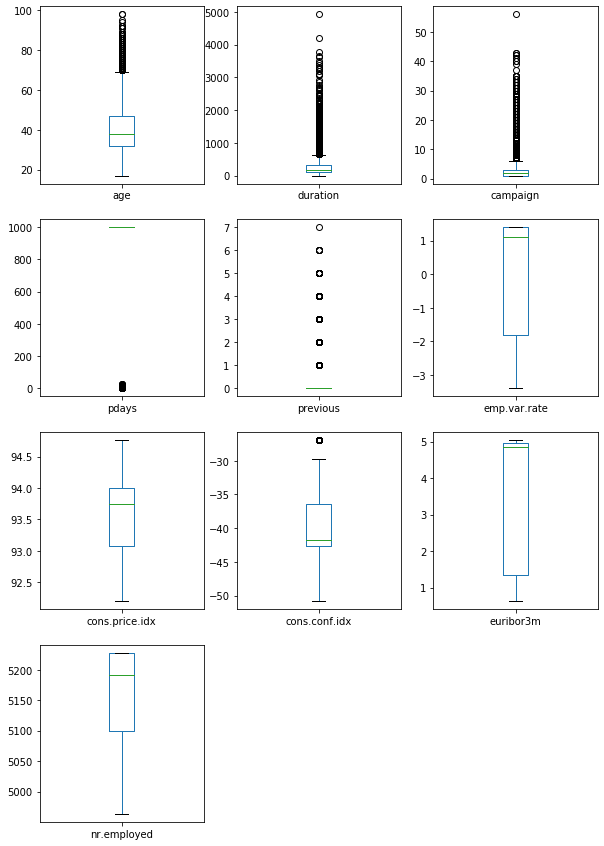

In [15]:
cont_features.plot(kind='box', layout=(4,3), subplots=True, figsize=(10,15))
plt.show()

Clearly From above Box plots, we there are many outliers is 4-5 features and all features have different range.

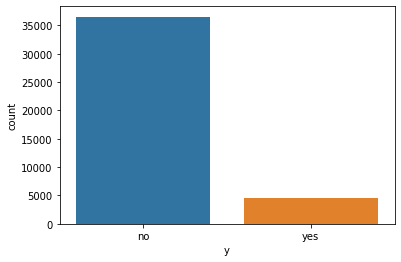

In [16]:
sns.countplot(data['y'])
plt.show()

# It show this data is imbalanced because more than 87% people didn't take this offer.

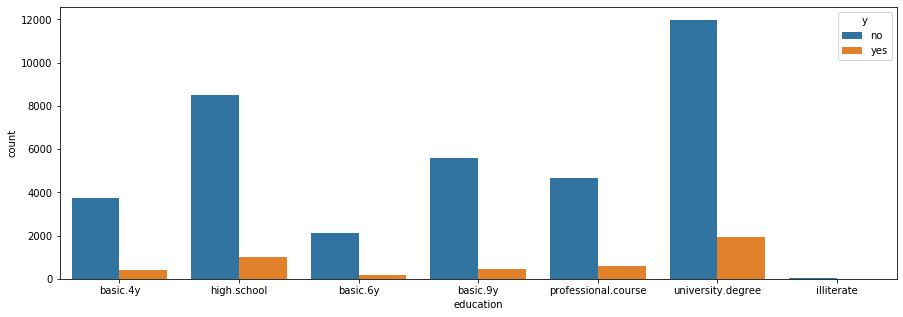

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'education', hue='y', data = data)
plt.show()

### People with University Degree Subscribed more for a Term Deposit.

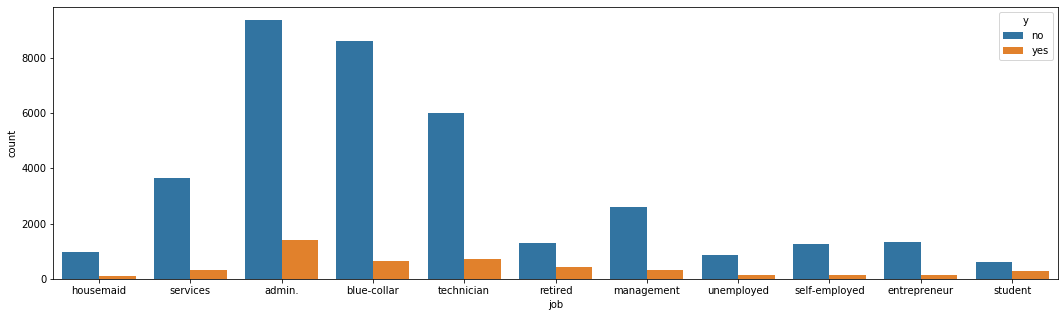

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'job', hue='y', data = data)
plt.show()

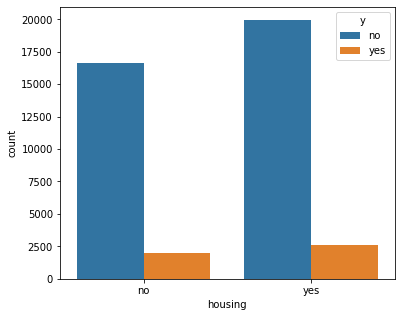

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'housing', hue='y', data = data)
plt.show()

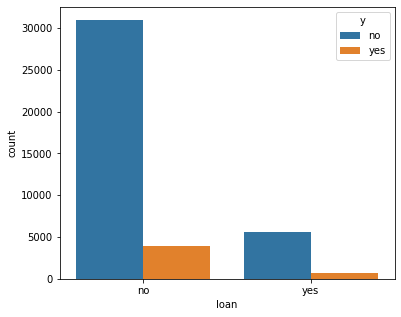

In [20]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'loan', hue='y', data = data)
plt.show()

### People who has housing loan on them subscribed more for a Term Depopsit and People who has no Personal Loan subscribed more for Term Deposit.

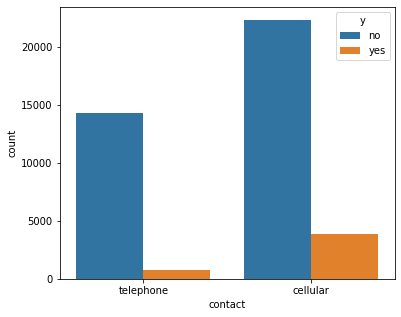

In [21]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'contact', hue='y', data = data)
plt.show()

### People Contacted on Cellular phopne subscribed more for Term Deposit.

# Part 1 : - Machine Learning Modeling

## Function for Data Precprocessing
1. Feature Selection
2. Feature Scaling

In [22]:
# Method parameter is for SelectKBest , n is for number of top scores
def feature_selection(features,target,method,n):
    
    # Selecting Best Features
    bestfeatures = SelectKBest(score_func = method, k = 'all')
    fit = bestfeatures.fit(features,target)
    
    feature_scores = pd.DataFrame(fit.scores_)
    feature_column_name=pd.DataFrame(features.columns)
    feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
    feature_score_df.columns=['Features','Score']
        
    largest_feature_score_df = feature_score_df.nlargest(n,'Score')
       
    return largest_feature_score_df

## Function to Label Encode the Categorical Features

This also part of Data Preprocessing

In [23]:
def Categorical_feature_encoding(features):
    features = features.apply( preprocessing.LabelEncoder().fit_transform )
    return features

## Function for train and test data split

In [24]:
def Data_split(x,y):
    train_x, test_x , train_y, test_y = train_test_split(x , y , test_size = 0.2 , random_state = 4)
    return train_x, test_x , train_y, test_y

## Function for Logistic Regression

In [25]:
def Logestic_Regression(train_x,train_y,test_x,test_y):
    Logestic_Reg = linear_model .LogisticRegression(C=0.01,solver='liblinear')
    print("Model :")
    print(Logestic_Reg)
    Logestic_Reg .fit( train_x , train_y )
    LRPred = Logestic_Reg.predict(test_x)
    LRPred = Logestic_Reg.predict(test_x)
    print("\n---------------Evaluation---------------")
    LR_as = metrics.accuracy_score( test_y, LRPred )
    print("\nScore of the Model is ",LR_as,'\n')
    sns.heatmap(confusion_matrix(test_y, LRPred), annot=True, cbar=False,  fmt='0.0f' )
    plt.show()
    return Logestic_Reg,LRPred,LR_as

## Function for K-Nearest Neighbour

In [26]:
def KNN_classifier(train_x,train_y,test_x,test_y):
    Ks = 10
    mean_acc = np.zeros((Ks))
    KNN = []

    for n in range(1,Ks+1):
        KnN = KNeighborsClassifier( n_neighbors = n ).fit(train_x,train_y)
        KNN.append(KnN)
        KPred_y = KnN.predict(test_x)
        mean_acc[n-1] = metrics.accuracy_score(test_y , KPred_y)
        
    plt.plot(range(1,Ks+1),mean_acc,'g')
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy Score')
    plt.xlabel('Number of Neighbours (K)')
    plt.tight_layout()
    plt.show()
    
    print("\nModel of best accuracy:")
    print(KNN[mean_acc.argmax()])
    print("\n---------------Evaluation---------------")
    print( "\nScore of the best model is", mean_acc.max(), "with k =", mean_acc.argmax()+1) 
    return KNN[mean_acc.argmax()],mean_acc.max()

## Function for Decision Tree

In [27]:
def Decision_Tree_classifier(train_x,train_y,test_x,test_y):
    print("------------ HYPERPARAMETER TUNNING ------------\n")
    parameter = {'criterion': ["gini", "entropy"], 'max_depth': [5, 8, 10, 20,None], 'random_state' : [2, 4, 10, 50] }
    seed = 4
    D_Tre = DecisionTreeClassifier()
    kflod = KFold( n_splits = 10, random_state = seed )
    grid = GridSearchCV( estimator = D_Tre, param_grid = parameter, scoring = 'accuracy', cv = kflod )
    grid_result = grid.fit(train_x, train_y)
    print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)
    
    print("\n---------- Model with parameter tunning ---------\n")
    p = [x for x in grid_result.best_params_.values()]
    D_Tre = DecisionTreeClassifier( criterion = p[0] , max_depth = p[1] , random_state = p[2] )
    print(f"Model :")
    print(D_Tre)
    D_Tre.fit(train_x,train_y)
    DTPred = D_Tre.predict(test_x)
    print("\n---------------Evaluation---------------")
    DT_as = metrics.accuracy_score( test_y , DTPred )
    print("\nScore of the Model is ",DT_as,'\n')
    sns.heatmap(confusion_matrix(test_y, DTPred), annot=True, cbar=False,  fmt='0.0f' )
    plt.show()
    return D_Tre,DTPred,DT_as
    

## Function for Random Forest

In [28]:
def Random_Forest_classifier(train_x,train_y,test_x,test_y):
    print("------------ HYPERPARAMETER TUNNING ------------\n")
    parameter = {'criterion': ["gini", "entropy"], 'max_depth': [5, 8, 10, 20,None], 'random_state' : [2, 4, 10, 50] }
    
    seed = 4
    RF_class = RandomForestClassifier()
    kflod = KFold( n_splits = 10, random_state = seed )
    grid = GridSearchCV( estimator = RF_class, param_grid = parameter, scoring = 'accuracy', cv = kflod)
    grid_result = grid.fit(train_x, train_y)
    print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)
    
    print("\n---------- Model with parameter tunning ---------\n")
    p = [x for x in grid_result.best_params_.values()]
    RF_class = RandomForestClassifier( criterion = p[0] , max_depth = p[1] , random_state = p[2] )
    print(f"Model :")
    print(RF_class)
    RF_class.fit(train_x , train_y)
    RFCPred = RF_class.predict(test_x)
    print("\n---------------Evaluation---------------")
    RFC_as = metrics.accuracy_score(test_y, RFCPred)
    print("\nScore of the Model is ",RFC_as,'\n')
    sns.heatmap(confusion_matrix(test_y, RFCPred), annot=True, cbar=False,  fmt='0.0f' )
    plt.show()
    return RF_class,RFCPred,RFC_as

## Function for Support Vector Machine

In [29]:
def Support_Vector_Machine(train_x,train_y,test_x,test_y):
    SVM = svm.SVC(kernel = 'rbf')
    print(f"Model:")
    print(SVM)
    SVM.fit(train_x , train_y)
    SVMPred = SVM.predict(test_x)
    SVM_as = metrics.accuracy_score( test_y , SVMPred )
    print("\n---------------Evaluation---------------")
    print("\nScore of the Model is ",SVM_as,'\n')
    sns.heatmap(confusion_matrix(test_y, SVMPred), annot=True, cbar=False,  fmt='0.0f' )
    plt.show()
    return SVM,SVMPred,SVM_as
    

## Function for Naive Bayes

In [30]:
def Naive_Bayes_Classifier(train_x,train_y,test_x,test_y):
    print("Bernoulli Naive Bayes Classifier used because this is a binary classififcation problem!\n")
    BNB_class = BernoulliNB()
    print(f"Model is Ready : ")
    print(BNB_class)
    BNB_class.fit(train_x , train_y)
    BNBPred = BNB_class.predict(test_x)
    print("\n---------------Evaluation---------------")
    BNB_as = metrics.accuracy_score( test_y , BNBPred)
    print("\nScore of the Model is ",BNB_as,'\n')
    sns.heatmap(confusion_matrix(test_y, BNBPred), annot=True, cbar=False,  fmt='0.0f' )
    plt.show()
    return BNB_class,BNBPred,BNB_as


## Data Preprocessing

In [31]:
total = 0
for col in cat_features.columns:
    print(col,":",len(cat_features[col].unique()),'labels.')
    total += len(cat_features[col].unique())

job : 11 labels.
marital : 3 labels.
education : 7 labels.
default : 2 labels.
housing : 2 labels.
loan : 2 labels.
contact : 2 labels.
month : 10 labels.
day_of_week : 5 labels.
poutcome : 3 labels.


In [32]:
print(f"Total number of different categories in all features are {total}")

Total number of different categories in all features are 47


In [33]:
cat_features = pd.get_dummies(cat_features,drop_first=True)

In [34]:
cat_features.head(2)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [35]:
target = Categorical_feature_encoding(data.iloc[:,-1:])

**-> Continuous Feature Selection and Scaling**

ANOVA is used for selection and MinMaxScaler for scaling

In [36]:
largest_feature_score_df = feature_selection( cont_features, target, f_classif, 5)

In [37]:
largest_feature_score_df

,Features,Score
1,duration,8094.101634
9,nr.employed,5926.610601
3,pdays,4861.173272
8,euribor3m,4309.479048
5,emp.var.rate,4023.829925


In [38]:
cont_features = cont_features[[x for x in largest_feature_score_df['Features']]]

In [39]:
features = pd.concat((cont_features,cat_features),axis=1)

In [40]:
features.head(2)

,duration,nr.employed,pdays,euribor3m,emp.var.rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,261,5191.0,999,4.857,1.1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,149,5191.0,999,4.857,1.1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [41]:
x = preprocessing.MinMaxScaler().fit(features).transform(features)

In [42]:
y = target.values

### Train and Test data split

In [43]:
train_x, test_x , train_y, test_y = Data_split(x,y)

Size of the train and test dataset is also remain same.

# (1). Logistic Regression

Model :
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

---------------Evaluation---------------

Score of the Model is  0.8991260014566642 



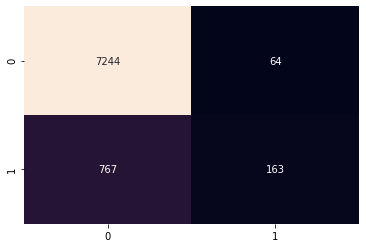

In [44]:
Logestic_Reg,LRPred,lras = Logestic_Regression(train_x,train_y,test_x,test_y)

# (2). KNN Classifier

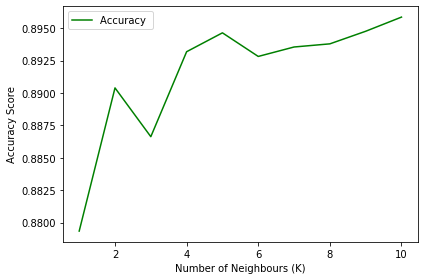


Model of best accuracy:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

---------------Evaluation---------------

Score of the best model is 0.8958485069191552 with k = 10


In [45]:
KNN,knnas = KNN_classifier(train_x,train_y,test_x,test_y)

# (3). Decision Tree Classifier

------------ HYPERPARAMETER TUNNING ------------

Best Parameter :  {'criterion': 'gini', 'max_depth': 5, 'random_state': 10} with score :  0.9131714719271624

---------- Model with parameter tunning ---------

Model :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

---------------Evaluation---------------

Score of the Model is  0.9142995872784656 



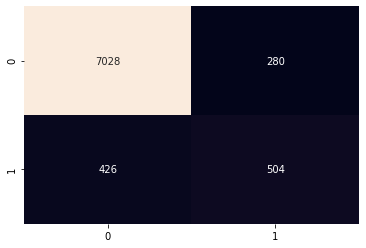

In [46]:
D_Tre,DTPred,dtas = Decision_Tree_classifier(train_x,train_y,test_x,test_y)

# (4). Support Vector Machine (SVM)

Model:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

---------------Evaluation---------------

Score of the Model is  0.9011896091284293 



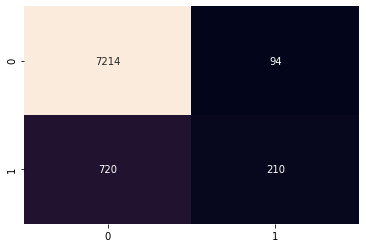

In [47]:
SVM,SVMPred,svmas = Support_Vector_Machine(train_x,train_y,test_x,test_y)

# (5). Random Forest

------------ HYPERPARAMETER TUNNING ------------

Best Parameter :  {'criterion': 'entropy', 'max_depth': 20, 'random_state': 2} with score :  0.9134446130500757

---------- Model with parameter tunning ---------

Model :
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

---------------Evaluation---------------

Score of the Model is  0.9118718135469774 



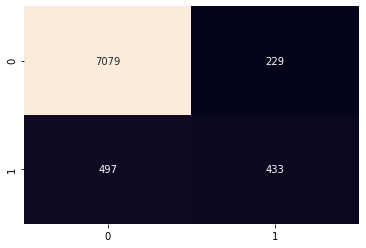

In [48]:
RF_class,RFCPred,rfcas = Random_Forest_classifier(train_x,train_y,test_x,test_y)

# (6). Bernoulli Naive Bayes

Bernoulli Naive Bayes Classifier used because this is a binary classififcation problem!

Model is Ready : 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

---------------Evaluation---------------

Score of the Model is  0.8852876911871813 



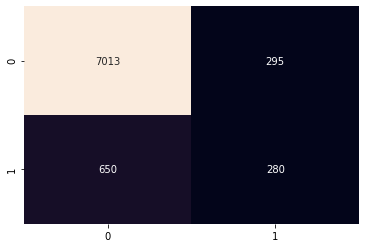

In [49]:
BNB_class,BNBPred,bnbas = Naive_Bayes_Classifier(train_x,train_y,test_x,test_y)

# Accuracy Score's Dataframe

In [50]:
model_scores = pd.DataFrame([lras*100, knnas*100, dtas*100, svmas*100, rfcas*100, bnbas*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
model_scores

,Accuracy Score
Logistic Regression Model,89.912600
KNN Model,89.584851
Decision Tree Model,91.429959
Support Vector Machine,90.118961
Random Forest Classifier,91.187181
Bernoulli Naive Bayes,88.528769


# Deduction

Clearly from the accuracy comparision dataframe, Accuracy of all Model are quite good but among them Random Forest and Decision Tree both did litle better to get accuracy more than 90%.


## So, from this i can that using Random Forest Classifier is better choice.

# Finalizing Random Forest Model for this part

In [53]:
print("Final Model used to predict the target in this outcome is Random Forest using Both type of features")
RF_class

Final Model used to predict the target in this outcome is Random Forest using Both type of features


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [54]:
print(f"Accuracy Scaore of Random Forest : {rfcas*100}")

Accuracy Scaore of Random Forest : 91.18718135469774


Confusion Matrix


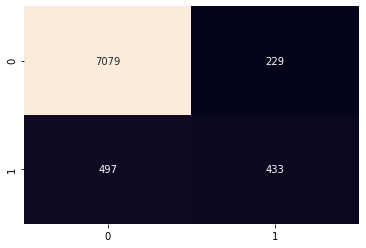

In [55]:
print("Confusion Matrix")
sns.heatmap(confusion_matrix(test_y,RFCPred), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

In [56]:
print("Classification Report of the Model:\n")
print(classification_report(test_y , RFCPred))

Classification Report of the Model:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.65      0.47      0.54       930

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



# Part 2 :- Artificial Neural Network

**Importing the Keras libraries and packages**

In [57]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adamax

Using TensorFlow backend.


**First we initialize the Model**

In [58]:
classifier = Sequential()

**Input Dense Layer with 6 neurons and relu activation function. Also he_normal is used to default initialisation of weights**

In [59]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = train_x.shape[1]))

**Just 3 Hidden Dense Layers is used with 6 neurons and relu activation function. For weight initializer again he_normal is used.**

In [69]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

**Output Dense Layer is defined with single neuron and sigmoid activation function**

In [70]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

**To compile the Network binary crossentropy as Loss Function, Adamax as Optimizer and accuracy as metric are used.**

In [71]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Model is fitted with 50 epoches, 0.33 as validation split and 10 batch size is selected.**

In [72]:
model_history = classifier.fit(train_x,train_y,validation_split=0.33, batch_size = 10, nb_epoch = 100)

Train on 22076 samples, validate on 10874 samples
Epoch 1/100
22076/22076 [==============================] - 14s 632us/step - loss: 0.2284 - accuracy: 0.9008 - val_loss: 0.1936 - val_accuracy: 0.9047
Epoch 2/100
22076/22076 [==============================] - 13s 604us/step - loss: 0.1884 - accuracy: 0.9098 - val_loss: 0.1906 - val_accuracy: 0.9126
Epoch 3/100
22076/22076 [==============================] - 13s 596us/step - loss: 0.1863 - accuracy: 0.9106 - val_loss: 0.1989 - val_accuracy: 0.9019
Epoch 4/100
22076/22076 [==============================] - 13s 598us/step - loss: 0.1859 - accuracy: 0.9099 - val_loss: 0.1886 - val_accuracy: 0.9083
Epoch 5/100
22076/22076 [==============================] - 13s 597us/step - loss: 0.1848 - accuracy: 0.9118 - val_loss: 0.2011 - val_accuracy: 0.9023
Epoch 6/100
22076/22076 [==============================] - 13s 596us/step - loss: 0.1851 - accuracy: 0.9113 - val_loss: 0.1849 - val_accuracy: 0.9129
Epoch 7/100
22076/22076 [=========================

Epoch 55/100
22076/22076 [==============================] - 13s 602us/step - loss: 0.1797 - accuracy: 0.9165 - val_loss: 0.1901 - val_accuracy: 0.9092
Epoch 56/100
22076/22076 [==============================] - 13s 602us/step - loss: 0.1790 - accuracy: 0.9156 - val_loss: 0.1863 - val_accuracy: 0.9121
Epoch 57/100
22076/22076 [==============================] - 13s 603us/step - loss: 0.1796 - accuracy: 0.9155 - val_loss: 0.1896 - val_accuracy: 0.9116
Epoch 58/100
22076/22076 [==============================] - 13s 595us/step - loss: 0.1787 - accuracy: 0.9164 - val_loss: 0.1895 - val_accuracy: 0.9103
Epoch 59/100
22076/22076 [==============================] - 16s 704us/step - loss: 0.1796 - accuracy: 0.9161 - val_loss: 0.1862 - val_accuracy: 0.9125
Epoch 60/100
22076/22076 [==============================] - 14s 652us/step - loss: 0.1793 - accuracy: 0.9158 - val_loss: 0.1875 - val_accuracy: 0.9086
Epoch 61/100
22076/22076 [==============================] - 14s 618us/step - loss: 0.1791 - ac

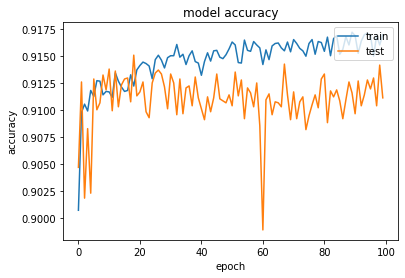

In [73]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

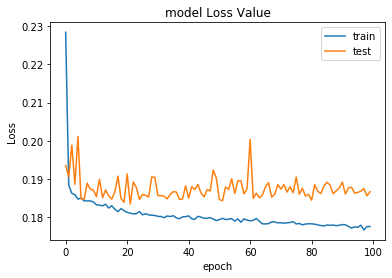

In [74]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model Loss Value')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Predicting Values

In [75]:
pred_y = classifier.predict(test_x)
pred_y = (pred_y > 0.5)

### Evaluating the Model

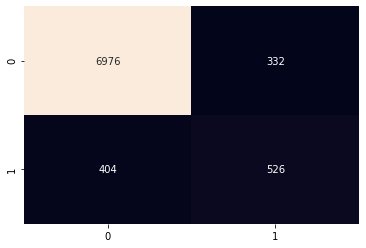

In [76]:
sns.heatmap(confusion_matrix(test_y, pred_y), annot=True, cbar=False,  fmt='0.0f' )

In [77]:
score=accuracy_score(pred_y,test_y)
score

0.9106579266812334

## ANN Classifier also give same accuracy score.